# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

### Steps to follow
1. Reading, Understanding and visualising the data
2. Preparing the data for modelling (train-test split, rescalling, etc)
3. Training the model
4. Residual Analysis
5. Prediction and evaluation 

## Importing and understanding data

#### import the warnings to avoid the warning after importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### importing important libraries to be used in the assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing day.csv
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the no of column and details in the file
bike.shape

(730, 16)

In [5]:
#checking the missing values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#from the given data we can see that instant is an index column so we drop it
bike.drop(['instant'],axis=1,inplace=True)

In [7]:
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

bike.drop(['dteday'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#check for datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
#from data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values

In [12]:
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
bike['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [15]:
#Renaming the columns
bike.rename(columns = {'yr':'Year','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,season,Year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [17]:
#changing datatypes of numerical columns to appropriate types

bike[['temp','atemp','humidity','windspeed','count']]=bike[['temp','atemp','humidity','windspeed','count']].apply(pd.to_numeric)

In [18]:
bike.head()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [19]:
#Performing EDA

# 1)PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

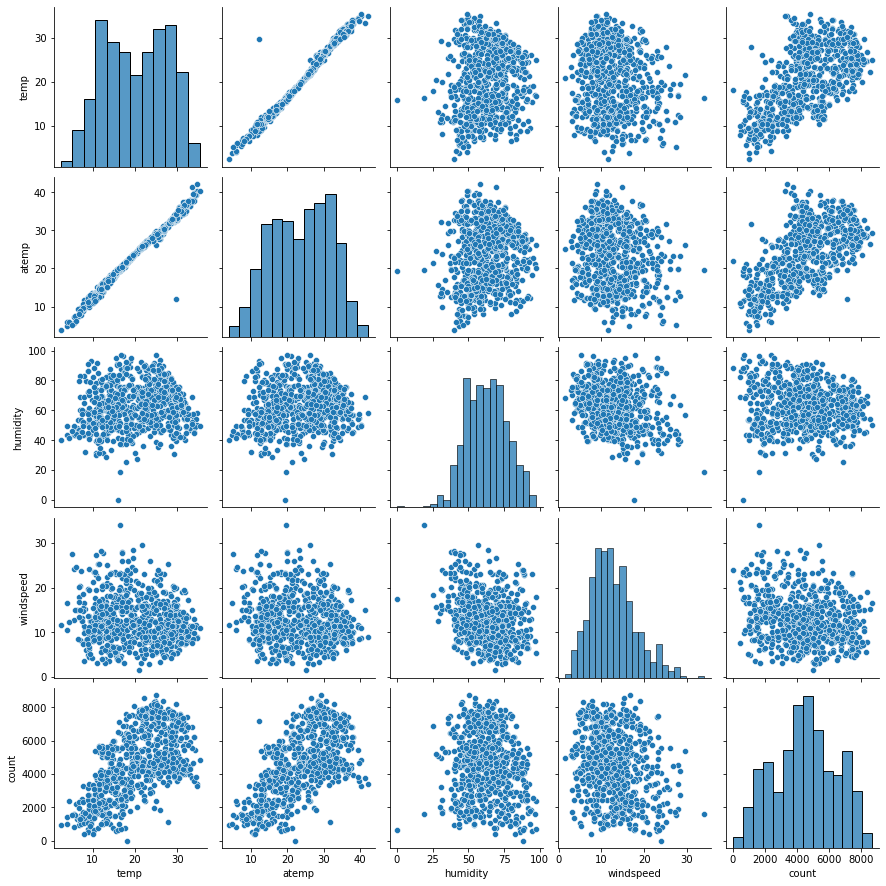

In [20]:
sns.pairplot(bike, vars=['temp','atemp','humidity','windspeed',"count"])
plt.show()

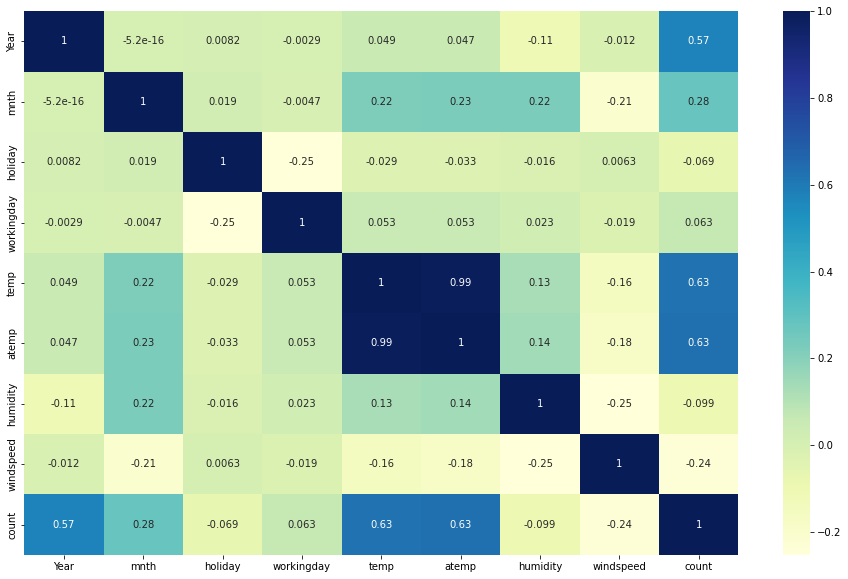

In [21]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

### From the above correlation we can observe that count,atemp count,year count,month are all correlated

In [22]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

bike.drop(['temp'],axis=1,inplace=True)
bike.head()

,season,Year,mnth,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


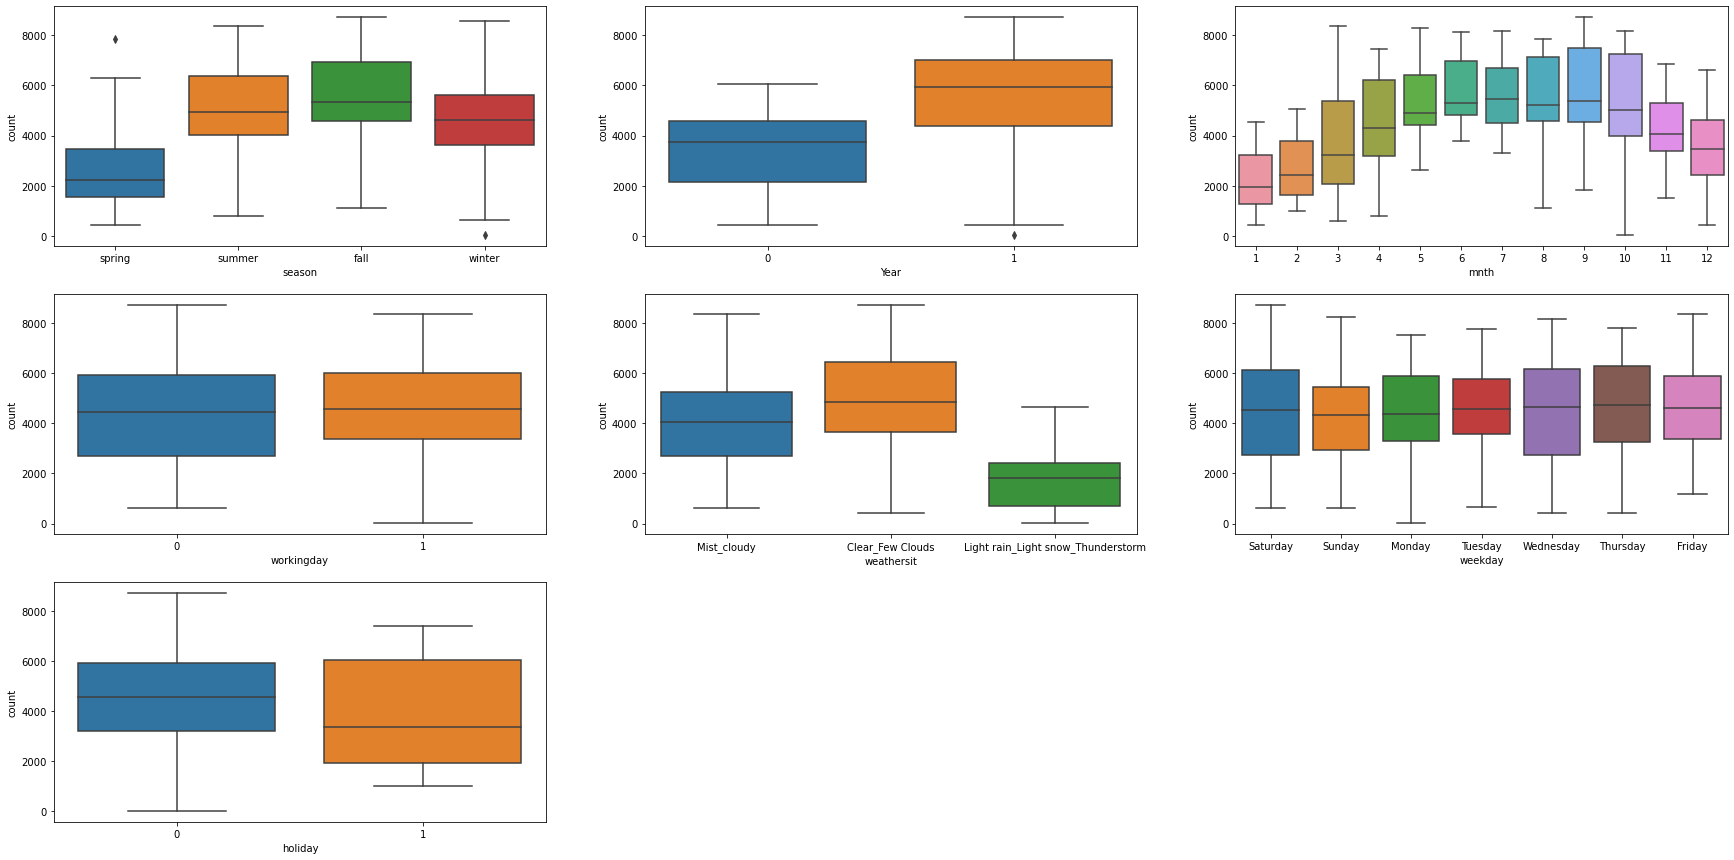

In [23]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.show()

### From the above graph we can assume that
###### The fall season has more no of count
###### The year 2019 has more no of count
###### Month 8,9,10 has the respectively more count 
###### People prefer to rent bike more on holiday
###### The weather in the clear_few_clouds are having more rental bike booking
##### On saturday the count for booking is more

# Creating dummy variables

In [24]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [25]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(bike['season'],drop_first=True)
Weather_condition=pd.get_dummies(bike['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(bike['weekday'],drop_first=True)
Month=pd.get_dummies(bike['mnth'],drop_first=True)

In [26]:
bike=pd.concat([bike,Season_condition],axis=1)
bike=pd.concat([bike,Weather_condition],axis=1)
bike=pd.concat([bike,Day_of_week],axis=1)
bike=pd.concat([bike,Month],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   Year                                730 non-null    int64  
 2   mnth                                730 non-null    int64  
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   humidity                            730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  count                               730 non-null    int64  
 11  spring                              730 non-n

In [27]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)

bike.drop(['weekday'],axis=1,inplace=True)

bike.drop(['mnth'],axis=1,inplace=True)


bike.head()

,Year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 2: Data Visualisation

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify Continuous and Categorical Features

In [29]:
#Checking the unique values in the data
bike.nunique().sort_values()

Year                                    2
10                                      2
9                                       2
8                                       2
7                                       2
6                                       2
5                                       2
4                                       2
3                                       2
2                                       2
Wednesday                               2
Tuesday                                 2
Thursday                                2
11                                      2
Sunday                                  2
Monday                                  2
Mist_cloudy                             2
Light rain_Light snow_Thunderstorm      2
winter                                  2
summer                                  2
spring                                  2
workingday                              2
holiday                                 2
Saturday                          

### Univariate Analysis

1. Season and Count

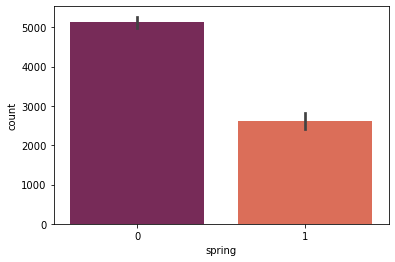

In [30]:
# Relation between season and count of bike rental

sns.barplot('spring','count',data=bike, palette="rocket")
plt.show()

### we can see that in spring season in 2018 we have more number of bike bookings

### Year

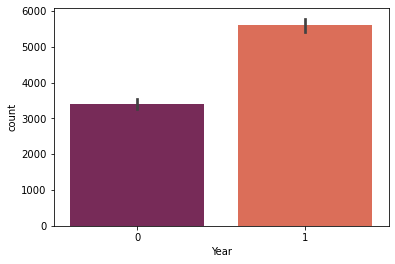

In [31]:
sns.barplot('Year','count',data=bike, palette="rocket")
plt.show()

##### In 2019 the count was more. It may happen the boombike has opened its booking in 2018 so the booking might came less but increased in 2019

### Scatterplot for temperature vs count

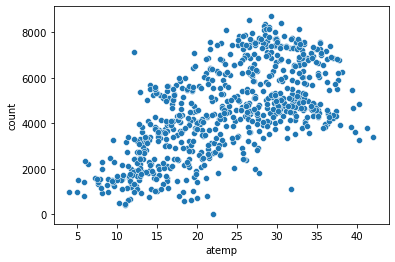

In [32]:
sns.scatterplot(x='atemp',y='count',data=bike)
plt.show()

##### Temperature ranging between 30-35 is considered ideal for booking a bike and driving.

### Scatter plot between humidity vs count

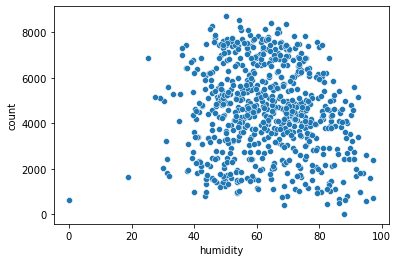

In [33]:
sns.scatterplot(x='humidity',y='count',data=bike)
plt.show()

###### humidity between 40-80 is considered ideal for booking the bike

In [34]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   atemp                               730 non-null    float64
 4   humidity                            730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   count                               730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  Light rain_Light snow_Thunderstorm  730 non-null    uint8  
 11  Mist_cloudy                         730 non-n

In [35]:
#see the statistical numerical summary of the data
bike.describe()

,Year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#Now we do the train_test split
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test=train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
bike_train.head()

,Year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
bike_train.columns

Index([                              'Year',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                 'humidity',
                                'windspeed',
                                    'count',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [39]:
#scaling the numerical data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
num_var=['atemp','humidity','windspeed','count']
bike_train[num_var]=scaler.fit_transform(bike_train[num_var])

In [41]:
bike_train.head()

,Year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
bike_train.describe()

,Year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#creating X and y
y_train=bike_train.pop('count')
X_train=bike_train

In [44]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
#Using RFE approach for feature selection
#We start with 15 variable and will use mixed approach to build a model

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm, 15)
rfe=rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 8),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 9),
 (12, False, 10)]

In [48]:
col=X_train.columns[rfe.support_]
col

Index([                              'Year',
                                  'holiday',
                                    'atemp',
                                 'humidity',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [50]:
X_train_rfe=X_train[col]

In [51]:
#Building model using statsmodel

import statsmodels.api as sm
X_train_rfe1=sm.add_constant(X_train_rfe)

In [52]:
lm=sm.OLS(y_train,X_train_rfe1).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          8.06e-186
Time:                        00:34:35   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### From the summary we can conclude that the model has a good r squared value of 84%. The p values cofficient are positive.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
3,humidity,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,Year,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [55]:
X_train_rfe1.head()

,const,Year,holiday,atemp,humidity,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [56]:
#Column humidity has a very high vif so we drop it

X_train_rfe=X_train_rfe.drop(['humidity'],axis=1)

In [57]:
import statsmodels.api as sm

In [58]:
X_train_rfe1=sm.add_constant(X_train_rfe)
lm1=sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.75e-183
Time:                        00:34:35   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### There is a slight adjust in the value of r-squared

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,Year,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [60]:
#Column atemp has a very high vif so we drop it

X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [61]:
X_train_rfe2=sm.add_constant(X_train_rfe)
lm2=sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.90e-153
Time:                        00:34:35   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### After readjusting the high vif value we can observe the change in the r squared values

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
2,windspeed,3.95
3,spring,2.10
0,Year,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [63]:
X_train_rfe.columns

Index([                              'Year',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [64]:
#Column windspeed has a very high vif>2 so we drop it

X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [65]:
X_train_rfe3=sm.add_constant(X_train_rfe)
lm3=sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          9.96e-148
Time:                        00:34:35   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
0,Year,1.85
5,Mist_cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [67]:
#winter has a very high p value so it is insignificant so we drop it

X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [68]:
X_train_rfe4=sm.add_constant(X_train_rfe)
lm4=sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          9.28e-149
Time:                        00:34:35   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
0,Year,1.61
2,spring,1.41
4,Mist_cloudy,1.39
5,3,1.23
9,8,1.13
6,4,1.11
7,5,1.11
10,9,1.11
8,6,1.07
1,holiday,1.03


In [70]:
#column 4 has a very high p-value so we drop it

X_train_rfe=X_train_rfe.drop([4],axis=1)

In [71]:
X_train_rfe5=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.76e-149
Time:                        00:34:36   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [72]:
#Adding Saturday and checking if model improves

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Saturday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1


In [73]:
X_train_rfe6=sm.add_constant(X_train_rfe)
lm6=sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.47e-148
Time:                        00:34:36   Log-Likelihood:                 406.77
No. Observations:                 510   AIC:                            -789.5
Df Residuals:                     498   BIC:                            -738.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
#Saturday has high p value so we drop it its not making any significant improvement

X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [75]:
X_train_rfe7=sm.add_constant(X_train_rfe)
lm7=sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.76e-149
Time:                        00:34:36   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [76]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
0,Year,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [77]:
#Adding sunday to check if the model improves

X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [78]:
X_train_rfe8=sm.add_constant(X_train_rfe)
lm8=sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.81e-150
Time:                        00:34:36   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [79]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
0,Year,1.54
2,spring,1.41
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [80]:
#Adding month 7 to check if the model improves

X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [81]:
X_train_rfe9=sm.add_constant(X_train_rfe)
lm9=sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.03e-154
Time:                        00:34:36   Log-Likelihood:                 424.54
No. Observations:                 510   AIC:                            -823.1
Df Residuals:                     497   BIC:                            -768.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [82]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
0,Year,1.62
2,spring,1.42
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.13
10,Sunday,1.12
6,5,1.11
9,9,1.11
11,7,1.08
7,6,1.07


#### As we can see from the above adding of the variables we are making sure to improve the model

In [83]:
#Adding month 10 to check if the model improves

X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [84]:
X_train_rfe10=sm.add_constant(X_train_rfe)
lm10=sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.24e-162
Time:                        00:34:36   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [85]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Featurues']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

,Featurues,VIF
0,Year,1.68
2,spring,1.45
4,Mist_cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


### after checking of subsiquent column we came to a conclusion that further improvement of r squared is not happening so we stop the addition of model and start to choose which model can be fit
#### Of all the model we checked upon lm10 seems to be a good fit to proceed

In [86]:
#Predicted value
y_train_count=lm10.predict(X_train_rfe10)

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#Calculating residuals

res=y_train-y_train_count

Text(0.5, 0, 'Errors')

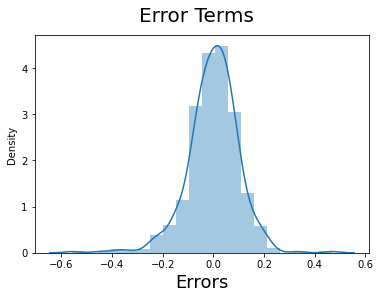

In [89]:
#Checking assumptions of normality 
#Plotting histogram of error terms
fig= plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)  #plotheading
plt.xlabel('Errors',fontsize=18)       #Xlabel

Text(0.5, 0, 'res')

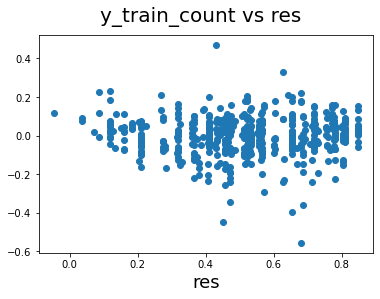

In [90]:
#Checking predicted vs residual data
#Plotting scatterplot of error terms
fig= plt.figure()
plt.scatter(y_train_count,res)
fig.suptitle('y_train_count vs res',fontsize=20)  #plotheading
plt.xlabel('y_train_count',fontsize=18)       #Xlabel
plt.xlabel('res',fontsize=18)     #Ylabel

### The scatter plot is predicted value vs residual value. We can conclude that the majority of residual value centred around 0.4 to 0.8 has a predicted value close to zero. This also pointing towards zero. The shape can also be refer as Heteroscadicity

### From the fig we can infer that it is centred around zero and is a normal curve

In [91]:
#Checking columns
X_train_rfe10.columns

Index([                             'const',
                                     'Year',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [92]:
print(X_train_rfe10.shape)
print(res.shape)

(510, 14)
(510,)


### Now we build the test set

In [93]:
num_vars=['atemp','humidity','windspeed','count']

In [94]:
bike_test[num_vars]=scaler.fit_transform(bike_test[num_vars])

In [95]:
#Creating x and y sets
y_test=bike_test.pop('count')
X_test=bike_test

In [96]:
X_train_new=X_train_rfe10.drop(['const'],axis=1)

In [97]:
#Lets use our model to make prediction
#Creating X_test_new dataframe by dropping variables from X_test

X_test_new=X_test[X_train_new.columns]

#Adding a constant variable
X_test_new =sm.add_constant(X_test_new)

In [98]:
X_train_rfe10.columns

Index([                             'const',
                                     'Year',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [99]:
#making prediction on the chosen model that is lm10

y_pred =lm10.predict(X_test_new)

Text(0.5, 0, 'y_test')

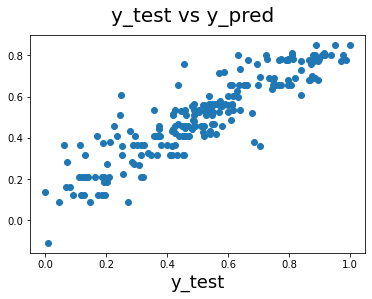

In [100]:
#Checking predicted vs test data
#Plotting scatterplot of error terms
fig= plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)  #plotheading
plt.xlabel('y_test',fontsize=18)       #Xlabel
plt.xlabel('y_test',fontsize=18)     #Ylabel

### We have a model that is good enough to predict the demand. Also it is showing the overlapping of actual and predicted count, thus it can explain the change in demand very well.

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [102]:
#Returns a mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred))

0.10573120032920406

In [103]:
#Calculate the r-squared for the test
r_squared= r2_score(y_test,y_pred)
r_squared

0.8029017439604782

In [104]:
#R squared of our model is 79.7

In [105]:
X_t=X_train_new.iloc[:,0].values

Text(0, 0.5, 'res')

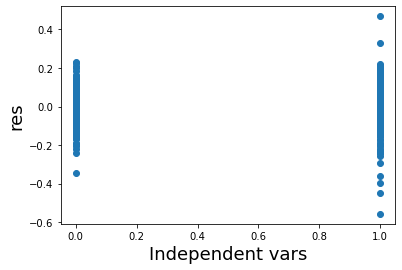

In [106]:
#Plotting the residuals to see if the pattern exist
#checking assumptions of homoscadesity and autocorrelations
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res',fontsize=20)
plt.xlabel('Independent vars',fontsize=18)
plt.ylabel('res',fontsize=18)

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [107]:
X_train_new.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [108]:
print(X_train_rfe10.columns)
print(lm10.summary())

Index([                             'const',
                                     'Year',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 11 Ap

### We can see that the equation for best fitted line is:
count= 0.246 X year - 0.083 X holiday - 0.198 X Spring - 0.321 X Light rain_Light snow_Thunderstorm - 0.090 X Mist_Cloudy +0.063 X 3 + 0.123 X 5 +0.148 X 6 +0.153 X 8 + 0.193 X 9 -0.049 X Sunday + 0.126 X 7 + 0.116 X 10
##### We can see the demand for bikes depends mainly on below variables:
year , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10
##### Demands increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and year
#### Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday
## Final recommendations for the company:
Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10